In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [38]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x **2 + rng.normal(size=100)
# Here p = 1, n =100, y = x - x^2 + e

<Axes: xlabel='x', ylabel='y'>

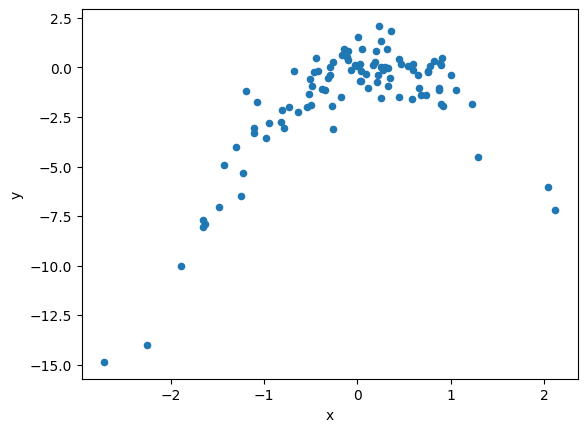

In [39]:
df = pd.DataFrame({'x':x, 'y':y})
df.plot.scatter('x','y')

In [40]:
np.random.seed(1)
min_deg = 1
max_deg = 5
scores = []
loo = LeaveOneOut()

In [44]:
for i in range(min_deg, max_deg):
    for train, test in loo.split(df):
        X_train, X_test = df['x'][train], df['x'][test]
        y_train, y_test = df['y'][train], df['y'][test]
        X_train = X_train.to_numpy()
        X_test =X_test.to_numpy()
        y_train = y_train.to_numpy()
        y_test = y_test.to_numpy()
        model = Pipeline([('poly', PolynomialFeatures(degree = i)),
        ('linear', LinearRegression())])
        model.fit(X_train[:,np.newaxis],y_train)
        # MSE
        score = mean_squared_error(y_test, model.predict(X_test[:,np.newaxis]))
        scores.append(score)
    print("Model %i (MSE): %f : "% (i, np.mean(scores)))
    scores=[]
        

Model 1 (MSE): 6.633030 : 
Model 2 (MSE): 1.122937 : 
Model 3 (MSE): 1.301797 : 
Model 4 (MSE): 1.332394 : 
